<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# ***K-Nearest Neighbors.***

Estimated time needed: **25** minutes.

$ \ $

-----

# ***Objectives.***

After completing this lab you will be able to:

*   Use K - Nearest neighbors to classify data.


$ \ $

-----

## ***What is K-Nearest Neighbors?***


**K-Nearest Neighbors** is a supervised learning algorithm that has the following properties:

$ \ $

$(1)$ The data is 'trained' with data points corresponding to their classification.

$ \ $

$(2)$ To predict the class of a given data point, it takes into account (cuenta) the classes of the 'K'- nearest data points and chooses the class in which the majority of the 'K' - nearest data points belong to as the predicted class.



<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">


In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.


$ \ $

---

## ***Note (choice of the $k$).***

In this sense, it is important to consider the value of k. Hopefully (Ojalá) from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K'- Nearest Neighbors (data points) when it predicts the classification of the test point.


$ \ $ 

-----

## ***Table of contents.***

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#about_dataset">About the dataset</a></li>
        <li><a href="https://#visualization_analysis">Data Visualization and Analysis</a></li>
        <li><a href="https://#classification">Classification</a></li>
    </ol>
</div>
<br>
<hr>


$ \ $

-----

## ***Packages.***

$(1)$ We install the scikit-learn machine learning library.

In [ ]:
!pip install scikit-learn==0.23.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


$ \ $

$(2)$ Let's load required libraries.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns 
%matplotlib inline 

$ \ $

-----

## ***About the dataset.***

$ \ $

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

$ \ $

The example focuses on using demographic data, such as:

* $\color{yellow}{Region}$

* $\color{yellow}{Age}$ 

* $\color{yellow}{Marital}$

to predict usage patterns. The target field, called $\color{aquamarine}{custcat}$, has four possible values that correspond to the four customer groups, as follows:

$(1)$ Basic Service

$(2)$ E-Service

$(3)$ Plus Service

$(4)$ Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K - nearest neighbour.


$ \ $

-----

## ***Load Data.***

Let's read the data using pandas library and print the first five rows.


In [ ]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


$ \ $

----

## ***Data Visualization and Analysis.***

$(1)$ Let’s see how many of each class is in our data set


In [ ]:
df["custcat"].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

The previous answer said us that:

$(1)$ Basic Service = 266

$(2)$ E-Service = 217

$(3)$ Plus Service = 281

$(4)$ Total Service = 236




$ \ $

----


## ***Example (visualization of the data - df["income"]).***

You can easily explore your data using visualization techniques:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0b9379be0>]],
      dtype=object)

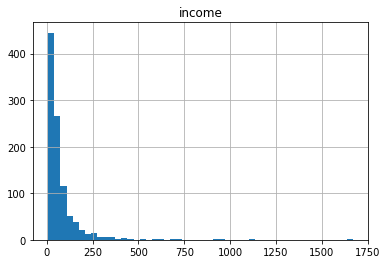

In [ ]:
df.hist(column="income", bins=50)

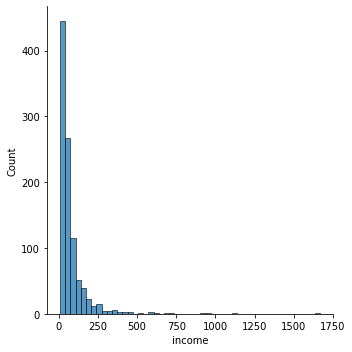

In [ ]:
sns.displot(df["income"],bins=50, kde = False)
plt.show() 

$ \ $

----

# ***Feature set (data base columns).***

$(1)$ Let's describe the feature sets of X:


In [ ]:
df.head(2)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4


In [ ]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

$ \ $

$(2)$ To use $\color{aquamarine}{\text{scikit-learn}}$ library, we have to convert the Pandas data frame to a Numpy array:


In [ ]:
X = df[["region", "tenure","age", "marital", "address", "income", "ed", "employ","retire", "gender", "reside"]].values  
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

$ \ $

$(3)$ What are our labels?


In [ ]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

$ \ $

-----

# ***Normalize Data.***


Data Standardization gives:

* The data zero mean 

* Unit variance

it is good practice, especially for algorithms such as KNN which is based on the distance of data points.

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

$ \ $ 

---

# ***Train Test Split.***

Out of $\color{aquamarine}{\text{Sample Accuracy}}$ (precision de muestra) is:

$ \ $

$\fbox{the percentage of correct predictions that the model makes on data that the model has $\color{yellow}{\text{NOT been trained on}}$.}$


$ \ $ 

---

# ***Train Test Split.***


Doing a train (ensayo - entrenamiento) and test (prueba) on the same dataset will most likely to: 

$ \ $

$\fbox{have low out-of-sample accuracy (tener baja precisión fuera de la muestra), due to the likelihood of our model overfitting.}$

$ \ $

It is important that our models have a high accuracy (precision), out-of-sample because the purpose of any model  is to make correct predictions on unknown data, so 

$ \ $

$\fbox{How can we improve out-of-sample accuracy?}$

$ \ $

One way is to use an evaluation approach called $\color{yellow}{\text{ (Train/Test) Split}}$. `(Train/Test) Split` involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 



$ \ $

----

## ***Import an important module.***

We import from ***sklearn.model_selection*** the function ***train_test_split***.

In [ ]:
#(1) importamos la funcion 
from sklearn.model_selection import train_test_split

#(2) Entrenamos en 20% de los datos y ponemos a prueba el 80% de los datos 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#(3) Mostramos en pantalla  las dimensiones del conjunto entrenado y la conjunto de pruebas obtenido
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


$ \ $

-----

# ***Example (classification / K-nearest neighbor ).***

$(1)$ We import the classifier implementing the k-nearest neighbors vote.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

$ \ $

$(2)$ Let's start the algorithm with k=4 for now:


In [ ]:
#(1) we take the variable k as 4
k = 4

#(2) we train the model and predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

#(3) we show on the screen the previous result
neigh 

KNeighborsClassifier(n_neighbors=4)

$ \ $

$(3)$ We can use the model to make predictions on the test set:


In [ ]:
y_hat = neigh.predict(X_test)
y_hat[0:5]

array([1, 1, 3, 2, 4])

$ \ $

$(4)$ In multilabel classification, ***`accuracy classification score`*** is a function that computes subset accuracy (precision). This function essentially calculates how closely the actual labels and predicted labels are matched in the test set.


In [ ]:
#(1) importamos el modulo metrics
from sklearn import metrics

#(2) we remember some data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
y_hat = neigh.predict(X_test)

#(3) we use the function to calculate the diference between the data train (test) and the results over the independent train (test) data.
t = metrics.accuracy_score(y_train, neigh.predict(X_train))
s = metrics.accuracy_score(y_test, y_hat)

#(4) we print on the screen our results
print("Train set Accuracy: ", t)
print("Test set Accuracy: ", s)

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


$ \ $ 

----

## ***Example (classification / K-nearest neighbor ).***

Can you build the model again, but this time with $k=6$?


In [ ]:
#(1) we take the variable k as 4.
k = 6

#(2) we train the model and predict.  
neig = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

#(3) we remember the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
Y_hat = neig.predict(X_test)

#(4) we use the function to calculate the diference between the data train (test) and the results over the independent train (test) data.
l = metrics.accuracy_score(y_train, neig.predict(X_train))
m = metrics.accuracy_score(y_test, Y_hat)

#(5) we print on the screen our results.
print("Train set Accuracy: ", l)
print("Test set Accuracy: ", m)


Train set Accuracy:  0.51625
Test set Accuracy:  0.31


$ \ $

----

## ***What about the number $K$?***

$K$ in $KNN$, is the number of nearest neighbors to examine. It is supposed to be specified by the user, so:

$ \ $

$$\text{How can we choose right value for K?}$$

$ \ $

The general solution is:

$(1)$ Reserve a part of your data for testing the accuracy (preciso) of the model.

$(2)$ Choose $k = 1$ and use the training part for modeling, and calculate the accuracy (precision) of prediction using all samples in your test set.

$(3)$ Repeat this process, increasing the $k$, and see which $k$ is the best for your model.

We can calculate the accuracy (precision) of $KNN$ for different values of $k$.


In [ ]:
#(1) Escogemos el valor de k igual a 10
k = 10

#(2) mean_acc = mean of accurancy = precision del promedio = creamos un arreglo de k-1 ceros, el cual luego iremos modificando
mean_acc = np.zeros(k)

#(3) std_acc = standar deviation of accurancy = precision de la desviacion estandar = mcreamos un arreglo de k-1 ceros, el cual luego iremos modificando
std_acc = np.zeros(k)

#(4) we remember the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#(5) 
for n in range(1,k+1):    
    
    #(a) Train Model and Predict tomando n neighbors
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)

    #(b) mostramos el resultado que se obtiene al tomar las X_test en la prediccion
    y_hat = neigh.predict(X_test)

    #(c) modificamos los valores de mean_acc
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)

    #(d) modificamos los valores de std_acc
    std_acc[n-1] = np.std(y_hat == y_test)/np.sqrt(y_hat.shape[0])


#(6) mostramos nuestros resultados en pantalla
mean_acc



array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 ])

$ \ $


Plot the model accuracy for a different number of neighbors.


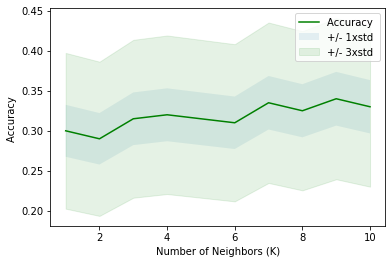

In [ ]:
#(1) creamos el plot
plt.plot(range(1,k+1), mean_acc, 'g')

#(2) NI IDEA
plt.fill_between(range(1,k+1), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,k+1), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10,color="green")

#(3) describimos las etiquetas y la leyenda
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')

#(4) mostramos en pantalla el resultado
plt.show()

In [ ]:
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 ])

In [ ]:
mean_acc.max()

0.34

In [ ]:
mean_acc.argmax()

8

In [ ]:
print( "The best accuracy (presicion) was with", mean_acc.max(), "with k = ", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9
